In [ ]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/leaf/Leaf_2"
##CATAGORIES = ['Strawberry_fresh','Strawberry_scrotch','Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy']
CATAGORIES = ['Healthy_Leaf','Unhealthy_Leaf']

In [ ]:
data = []

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    print(folder)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(100,100))
        #img_arr=np.array(img_arr).flatten()
        data.append([img_arr,label])

/content/drive/MyDrive/leaf/Leaf_2/Healthy_Leaf
/content/drive/MyDrive/leaf/Leaf_2/Unhealthy_Leaf


In [ ]:
#data

In [ ]:
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

In [ ]:
X= np.array(x)
Y=np.array(y)

In [ ]:
#X

In [ ]:
X = X/255

In [ ]:
#X

In [ ]:
X.shape

(4797, 100, 100, 3)

In [ ]:
#tenserflow 2.13.0
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation

In [ ]:
# #Model

# model=Sequential()

# #model.add( Conv2D(16,(3,3),activation='relu'))
# #model.add(MaxPooling2D(pool_size=(2,2)))

# model.add( Conv2D(1024,(3,3), padding="same",input_shape=X.shape[1:],activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add( Conv2D(512,(3,3), padding="same",activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add( Conv2D(256,(3,3), padding="same",activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add( Conv2D(128,(3,3), padding="same",activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add( Conv2D(64,(3,3), padding="same",activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# #model.add( Conv2D(32,(3,3), padding="same",activation='relu'))
# #model.add(MaxPooling2D(pool_size=(2,2)))





# #model.add( Conv2D(64,(3,3),activation='relu'))
# #model.add(MaxPooling2D(pool_size=(2,2)))


# #model.add( Conv2D(16,(3,3),activation='relu'))
# #model.add(MaxPooling2D(pool_size=(2,2)))


# model.add(Flatten())

# #model.add(Dense(32,activation='relu'))
# model.add(Dense(16,activation='relu'))
# model.add(Dense(2,activation='sigmoid'))

In [ ]:
# from keras.optimizers import Adam
# custom_learning_rate = 0.00001
# custom_optimizer = Adam(learning_rate=custom_learning_rate)
# #compile
# model.compile(loss='sparse_categorical_crossentropy',optimizer = custom_optimizer,metrics=['accuracy'])

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
layers = tf.keras.layers


# Define your ANN model
model = keras.Sequential([
    layers.Flatten(input_shape=(100, 100, 3)),  # Input layer
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Another hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation (for binary classification)
])

#model.add(layers.Dropout(0.0005))  # Example: Dropout with a 50% probability

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
#model.summary()

In [ ]:
#Train
history = model.fit(X,Y,epochs=50,validation_split=0.3)

Epoch 1/50
105/105 [==============================] - 3s 13ms/step - loss: 0.6539 - accuracy: 0.7727 - val_loss: 0.6226 - val_accuracy: 0.7090
Epoch 2/50
105/105 [==============================] - 1s 8ms/step - loss: 0.3005 - accuracy: 0.8776 - val_loss: 0.4623 - val_accuracy: 0.7861
Epoch 3/50
105/105 [==============================] - 1s 8ms/step - loss: 0.2945 - accuracy: 0.8847 - val_loss: 0.5707 - val_accuracy: 0.7472
Epoch 4/50
105/105 [==============================] - 1s 9ms/step - loss: 0.2681 - accuracy: 0.8945 - val_loss: 0.6973 - val_accuracy: 0.7069
Epoch 5/50
105/105 [==============================] - 1s 8ms/step - loss: 0.2652 - accuracy: 0.8957 - val_loss: 0.5745 - val_accuracy: 0.7368
Epoch 6/50
105/105 [==============================] - 1s 8ms/step - loss: 0.2519 - accuracy: 0.9020 - val_loss: 0.3059 - val_accuracy: 0.8632
Epoch 7/50
105/105 [==============================] - 1s 7ms/step - loss: 0.2652 - accuracy: 0.8960 - val_loss: 0.9608 - val_accuracy: 0.6458
Epoch

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               3840128   
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3864961 (14.74 MB)
Trainable params: 3864961 (14.74 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

# import keras.utils as img
# import numpy as np
# import cv2

# img_pred=tf.keras.utils.load_img(r"/content/drive/MyDrive/leaf/Leaf_2/Unhealthy_Leaf/image (1730).JPG",target_size=(100,100))

# img_pred=tf.keras.utils.img_to_array(img_pred)
# img_pred=np.expand_dims(img_pred, axis=0)

# #Predict
# rslt= model.predict(img_pred)

# print(rslt)
# if rslt[0][0]>rslt[0][1]:
#     prediction="Healthy_Leaf"
# else:
#     prediction="Unhealthy_Leaf"
# print(prediction)

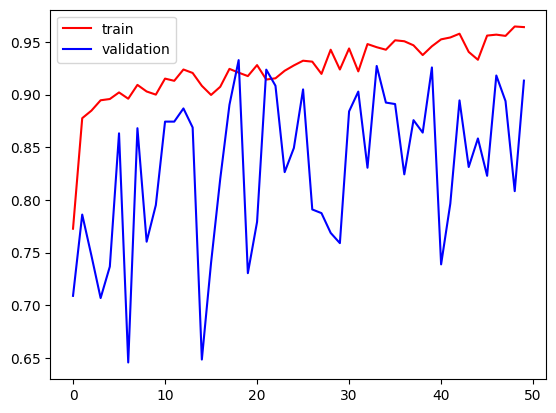

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/leaf/Leaf_2/accuracy.png')

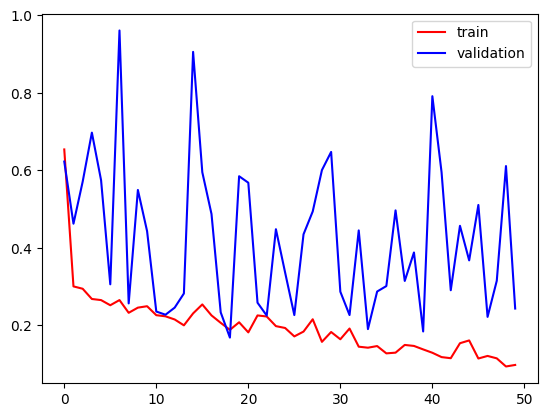

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
#plt.savefig('/content/drive/MyDrive/leaf/Leaf_2/loss.png')